## Cohort basic summary stats
In this notebook, we will demonstrate bla bla bla, and show that bla bla bal. the asjasdkflakf

In [173]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import os
from matplotlib import style
style.use('ggplot')
import warnings
warnings.filterwarnings("ignore")

In [12]:
subjs_dir = '../data/raw/'
pheno_file = '../src/ABIDEII_Composite_Phenotypic.csv'

### Get the subjects' names in my data

In [116]:
mydata = [file.replace('.json','') for file in os.listdir(subjs_dir) if file.endswith('.json')]

In [117]:
len(mydata)

1039

### Get the phenotype file and create the subjects names as they are in my data

In [118]:
pheno_df = pd.read_csv(pheno_file, encoding='iso-8859-1')

In [119]:
pheno_df.head()

,SITE_ID,SUB_ID,NDAR_GUID,DX_GROUP,PDD_DSM_IV_TR,ASD_DSM_5,AGE_AT_SCAN,SEX,HANDEDNESS_CATEGORY,HANDEDNESS_SCORES,...,ADI_R_C3_TOTAL,ADI_R_C4_REPETITIVE_USE_OBJECTS,ADI_R_C4_HIGHER,ADI_R_C4_UNUSUAL_SENSORY_INTERESTS,ADI_R_C4_TOTAL,ADI_R_D_AGE_PARENT_NOTICED,ADI_R_D_AGE_FIRST_SINGLE_WORDS,ADI_R_D_AGE_FIRST_PHRASES,ADI_R_D_AGE_WHEN_ABNORMALITY,ADI_R_D_INTERVIEWER_JUDGMENT
0,ABIDEII-BNI_1,29006,NaN,1,NaN,NaN,48.0,1,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,ABIDEII-BNI_1,29007,NaN,1,NaN,NaN,41.0,1,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,ABIDEII-BNI_1,29008,NaN,1,NaN,NaN,59.0,1,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,ABIDEII-BNI_1,29009,NaN,1,NaN,NaN,57.0,1,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,ABIDEII-BNI_1,29010,NaN,1,NaN,NaN,45.0,1,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [120]:
pheno_df['SITE_ID'] = pheno_df['SITE_ID'].apply(lambda x: x.replace("ABIDEII-",'').strip())

In [121]:
pheno_df['subj_id'] = pheno_df['SITE_ID'] + '_' + pheno_df['SUB_ID'].astype(str)

In [122]:
pheno_df['subj_id']

0       BNI_1_29006
1       BNI_1_29007
2       BNI_1_29008
3       BNI_1_29009
4       BNI_1_29010
           ...     
1109    USM_1_29523
1110    USM_1_29524
1111    USM_1_29525
1112    USM_1_29526
1113    USM_1_29527
Name: subj_id, Length: 1114, dtype: object

In [123]:
def fix_val(key, val):
    if key == "KKI":
        return "_".join([val.split('_')[0],val.split('_')[-1]])
    if key == "U_MI":
        return "UM_"+val.split('_')[-1]
    if key == "SU_2":
        return "STANFORD_"+ val.split('_')[-1]
    if key == "OILH":
        return "ONRC_2_part1_"+ val.split('_')[-1]  
def remove_middle_1(df, site_name):
    indices=[]
    vals = []
    for idx, val in df['subj_id'].items():
        if site_name in val:
            indices.append(idx)
            vals.append(fix_val(site_name, val))
        
    df.loc[indices, 'subj_id'] = vals
    return df

In [124]:
pheno_df = remove_middle_1(pheno_df, 'KKI')
pheno_df = remove_middle_1(pheno_df, 'U_MI')
pheno_df = remove_middle_1(pheno_df, 'SU_2')
pheno_df = remove_middle_1(pheno_df, 'OILH')


In [126]:
cntr = 0
for name in mydata:
    if name in pheno_df['subj_id'].tolist():
        cntr += 1
    else:
        print(name)
    
print(cntr)

fsaverage
1038


### Select only the columns of interest

In [128]:
df = pheno_df[['subj_id','DX_GROUP','AGE_AT_SCAN ','SEX','ADI_R_SOCIAL_TOTAL_A','ADI_R_VERBAL_TOTAL_BV',
              'ADI_R_NONVERBAL_TOTAL_BV','ADI_R_RRB_TOTAL_C','ADI_R_ONSET_TOTAL_D','ADOS_G_TOTAL',
              'ADOS_G_COMM','ADOS_G_SOCIAL','ADOS_G_STEREO_BEHAV','ADOS_G_CREATIVITY','ADOS_2_SOCAFFECT',
              'ADOS_2_RRB','ADOS_2_TOTAL','ADOS_2_SEVERITY_TOTAL','SRS_TOTAL_RAW','SRS_AWARENESS_RAW',
              'SRS_COGNITION_RAW','SRS_COMMUNICATION_RAW','SRS_MOTIVATION_RAW','SRS_MANNERISMS_RAW',
              'SRS_TOTAL_T','SRS_AWARENESS_T','SRS_COGNITION_T','SRS_COMMUNICATION_T','SRS_MOTIVATION_T',
              'SRS_MANNERISMS_T']]

In [129]:
df.to_csv('updated_pheno.csv')

In [134]:
df.set_index('subj_id', inplace=True)

In [211]:
print(df['DX_GROUP'].value_counts())
print(df['DX_GROUP'].value_counts()[1]/df['DX_GROUP'].value_counts().sum() )

2    593
1    521
Name: DX_GROUP, dtype: int64
0.46768402154398564


### Match our dataset with the phenotype dataframe

In [136]:
mydata.remove('fsaverage')

In [137]:
my_df = df.loc[mydata, :]

### Perform EDA

In [ ]:
# 1=Autism
# 2=Control

# 1=Male
# 2=Female



### Age distribution

In [174]:
df['site'] = df.index.map(lambda x: x.split('_')[0] if len(x.split('_'))==2 else '_'.join([x.split('_')[0],x.split('_')[1]]))

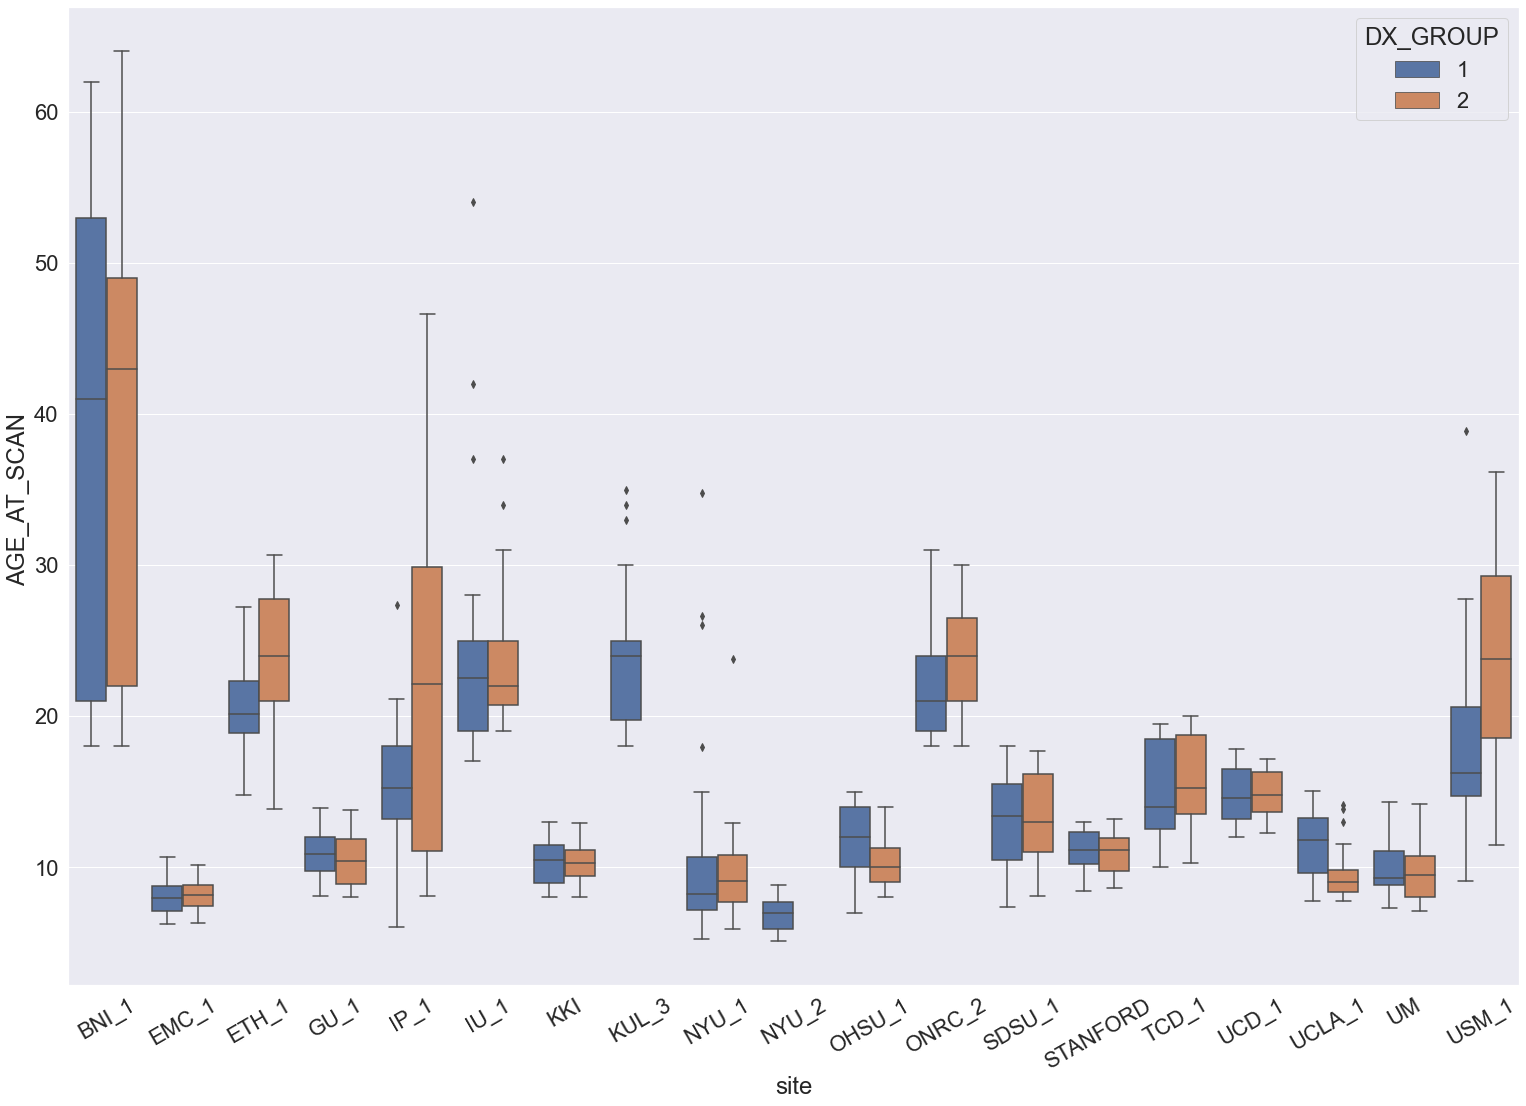

In [191]:
plt.figure(figsize=(26,18))
sns.set(font_scale=2)
ax = sns.boxplot(data=df, x='site',y='AGE_AT_SCAN ', hue='DX_GROUP')

ax.set_xticklabels(ax.get_xticklabels(),rotation=30)
plt.show()

### Number of missing values for each columns

In [166]:
df_asd = df[df['DX_GROUP']==1]
df_td = df[df['DX_GROUP']==2]


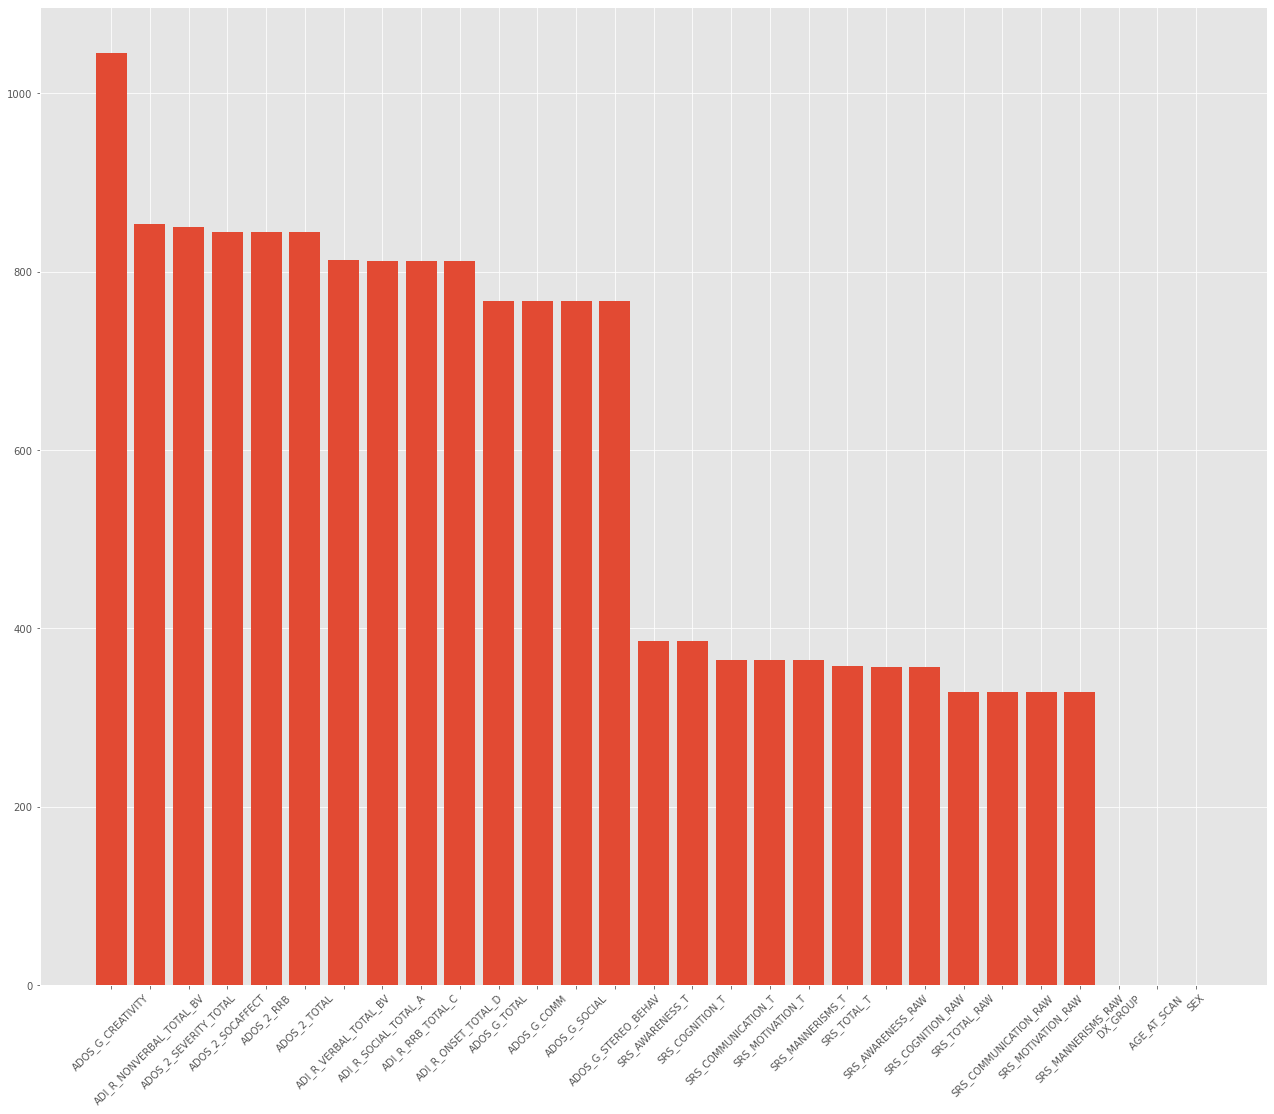

In [167]:
x = []
y = []
for col in df.columns:
    x.append(col)
    y.append(df[col].isna().sum())

sortedtup = sorted(zip(x,y), key=lambda x: x[1], reverse=True)

xs = []
ys = []
for i, j in sortedtup:
    xs.append(i)
    ys.append(j)
    
plt.figure(figsize=(22, 18))
plt.bar(xs, ys)
plt.xticks(rotation=45)
plt.show()    

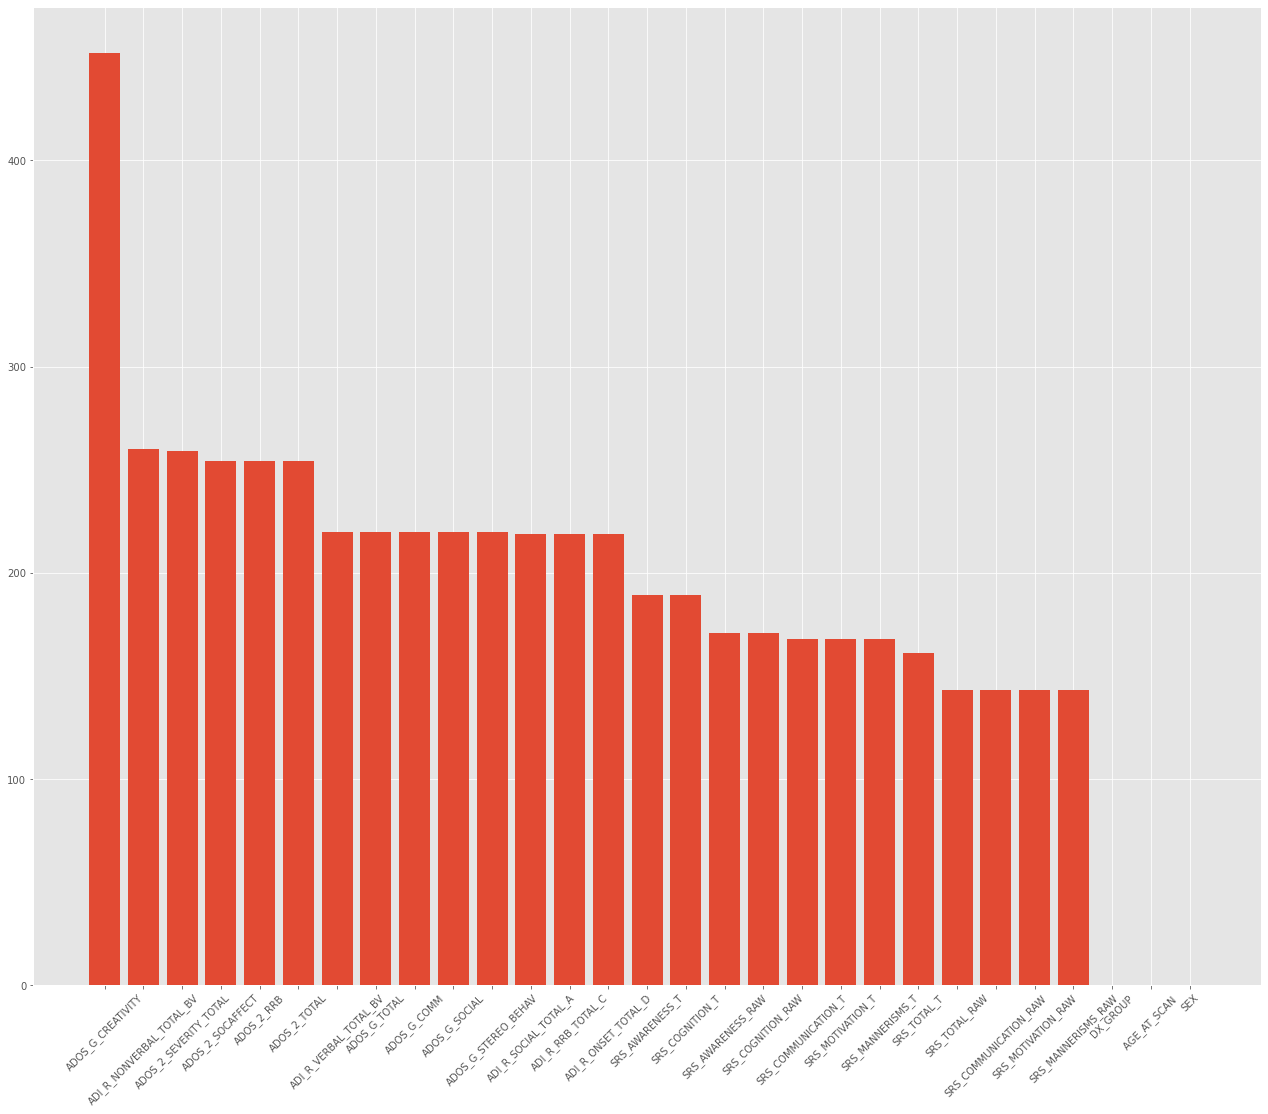

In [168]:
x = []
y = []
for col in df.columns:
    x.append(col)
    y.append(df_asd[col].isna().sum())

sortedtup = sorted(zip(x,y), key=lambda x: x[1], reverse=True)

xs = []
ys = []
for i, j in sortedtup:
    xs.append(i)
    ys.append(j)
    
plt.figure(figsize=(22, 18))
plt.bar(xs, ys)
plt.xticks(rotation=45)
plt.show()    

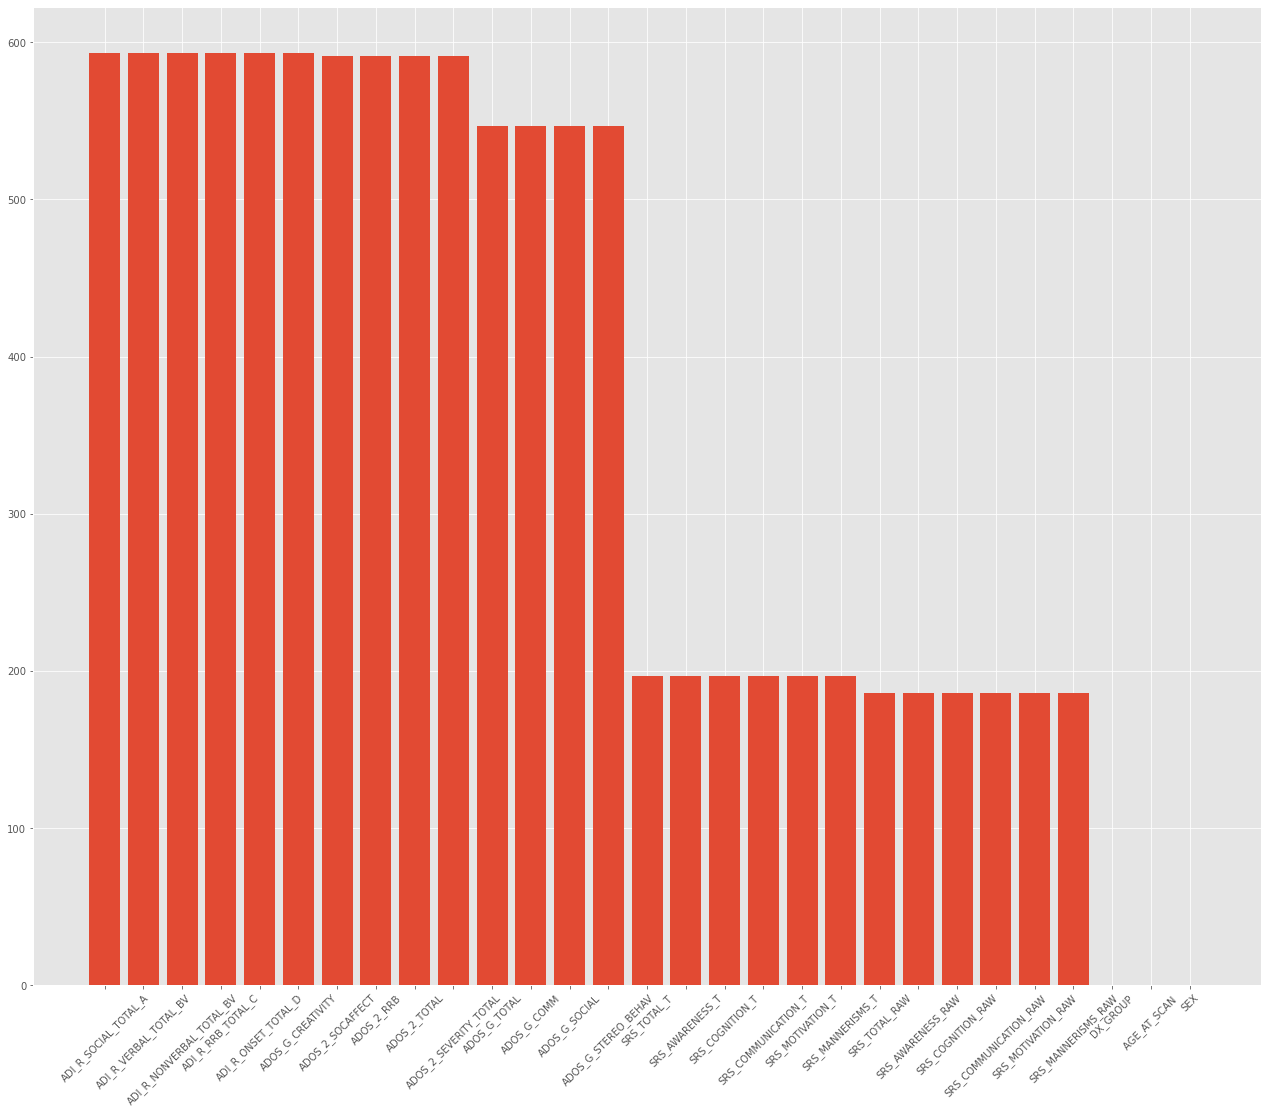

In [169]:
x = []
y = []
for col in df.columns:
    x.append(col)
    y.append(df_td[col].isna().sum())

sortedtup = sorted(zip(x,y), key=lambda x: x[1], reverse=True)

xs = []
ys = []
for i, j in sortedtup:
    xs.append(i)
    ys.append(j)
    
plt.figure(figsize=(22, 18))
plt.bar(xs, ys)
plt.xticks(rotation=45)
plt.show()    

### SRS distribution

In [194]:
srs_cols = [col for col in df.columns if 'SRS' in col]

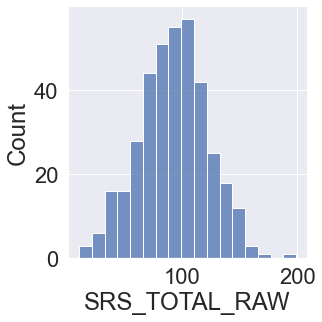

In [193]:
sns.displot(data=df_asd, x='SRS_TOTAL_RAW')

In [ ]:
sns.displot(data=df_asd, x='SRS_TOTAL_RAW')

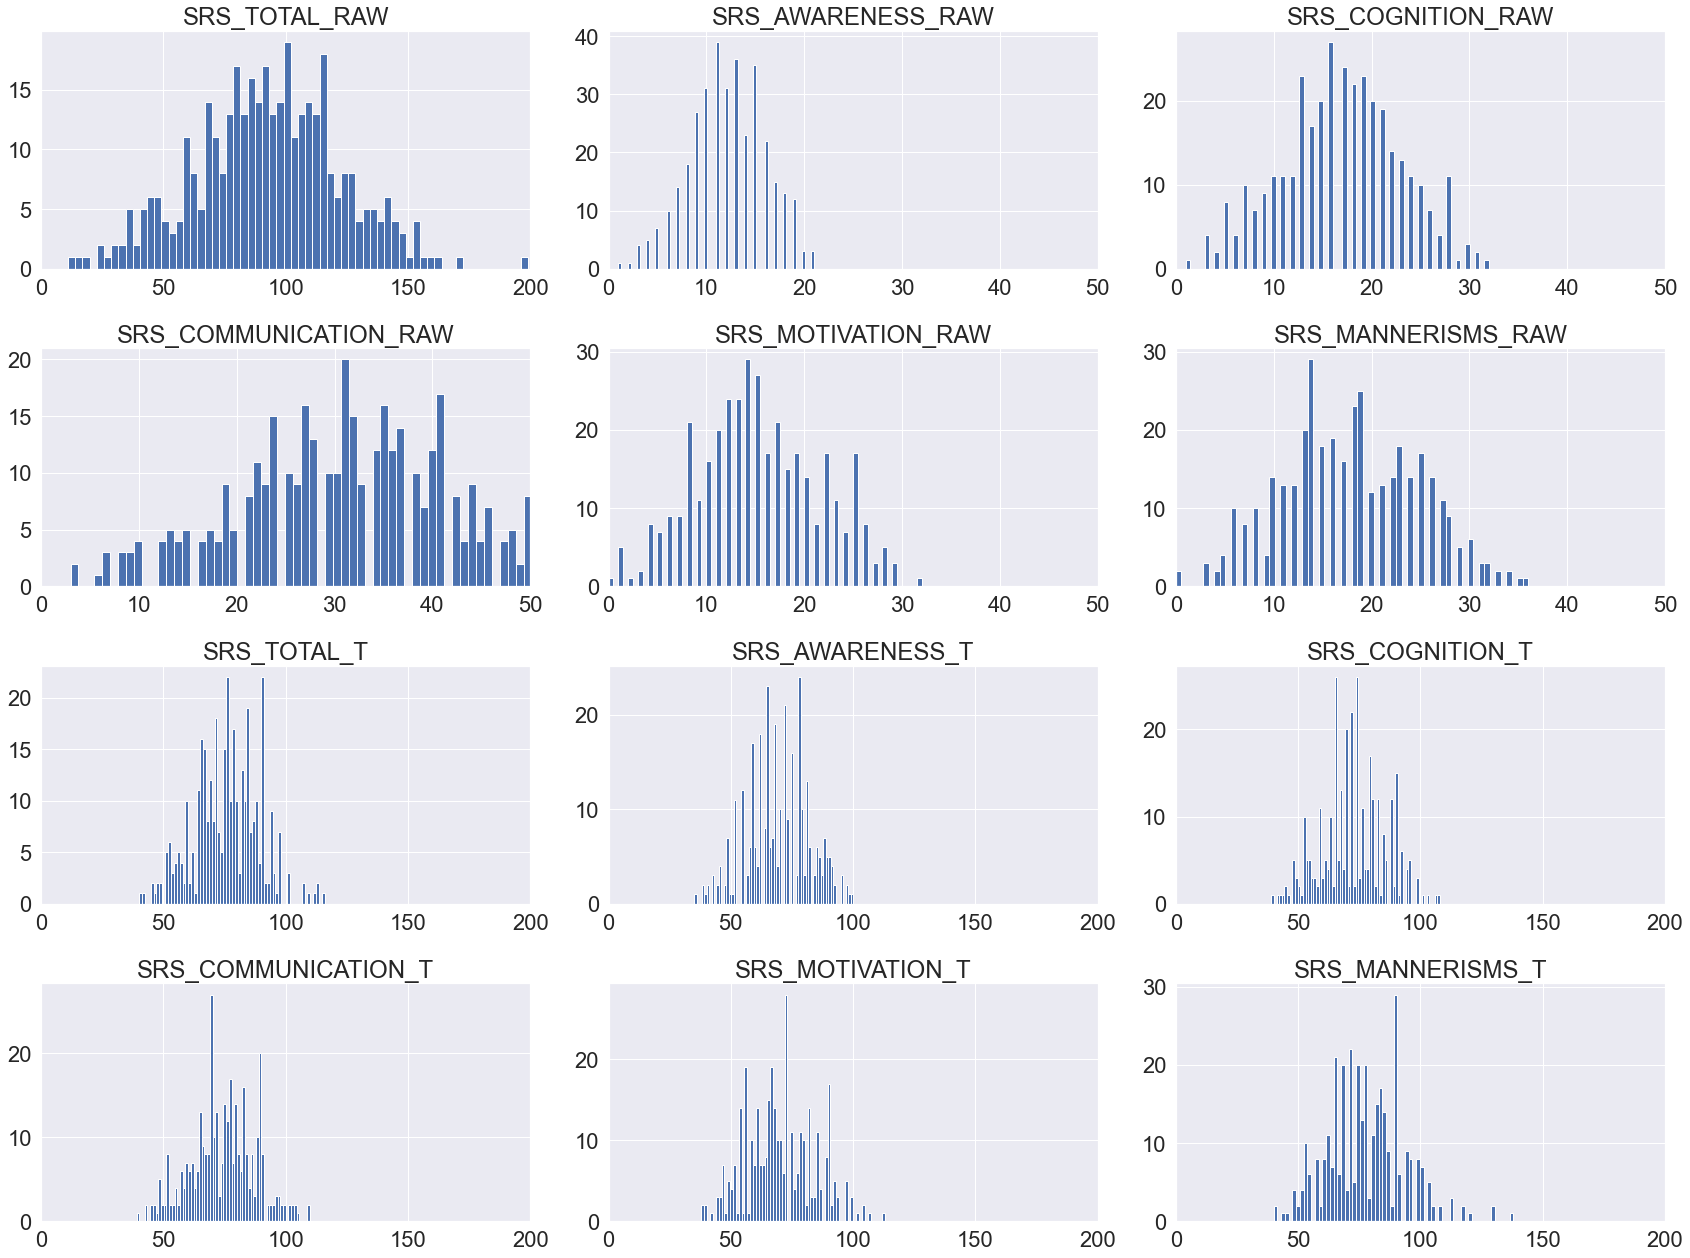

In [210]:
plt.figure(figsize=(24, 18))
for idx, col in enumerate(srs_cols):
    plt.subplot(4,3,idx+1)
    df_clean = df_asd[col].dropna()
#     sns.displot(data=df_clean)
    plt.hist(x=df_clean.values,bins=64)
    plt.title(col)
    if ('TOTAL' not in col) and ('_T' not in col):
        plt.xlim([0, 50])
    else:
        plt.xlim([0, 200])
plt.tight_layout()
plt.show()

2    593
1    521
Name: DX_GROUP, dtype: int64
0.46768402154398564


In [206]:
df[srs_cols[2]].dropna()

subj_id
BNI_1_29006    28.0
BNI_1_29007    14.0
BNI_1_29008     7.0
BNI_1_29009    14.0
BNI_1_29010    26.0
               ... 
USM_1_29504     0.0
USM_1_29505     1.0
USM_1_29512     2.0
USM_1_29513     6.0
USM_1_29523     0.0
Name: SRS_COGNITION_RAW, Length: 757, dtype: float64